## L2D Assignment - Machine Learning 4:

This notebook contains your assignment questions for the **Clustering Introduction** lesson. Please attempt and complete all questions. The topics this assignment will assess are:

1. Clustering Introduction


When you have completed your assignment, please commit the changes to your GitHub repository's 'Assignments' folder, as instructed in the [Assignments section](https://learntodiscover.github.io/L2D-Handbook/section7.html) of the [L2D Handbook](https://learntodiscover.github.io/L2D-Handbook).


Create the training and prediction workflow as shown in the lesson for a dataset with two other features, namely: Diastole and Systole values from the `patients_data.csv` file.


In [1]:
from numpy import arange, asarray, linspace, zeros, c_, mgrid, meshgrid, array, dot, percentile
from numpy import histogram, cumsum, around
from numpy import vstack, sqrt, logspace, amin, amax, equal, count_nonzero
from numpy.random import uniform, seed, randint, randn, multivariate_normal

from matplotlib.pyplot import subplots, scatter, xlabel, ylabel, axis, figure, colorbar, title, show
from matplotlib.colors import LogNorm

from pandas import read_csv

from sklearn.mixture import GaussianMixture
from sklearn.metrics.cluster import adjusted_rand_score

1. Extract the Diastole and Systole columns.

In [2]:
from pandas import read_csv

df = read_csv('Data/patients_data.csv')

df_np = df.to_numpy()

X = df_np[:, [3, 4]]

print(X.shape)

(100, 2)


2. Use the data to fit a Gaussian model with 2 components and create a state space contour plot of the negative log likelihood with scattered data superimposed.

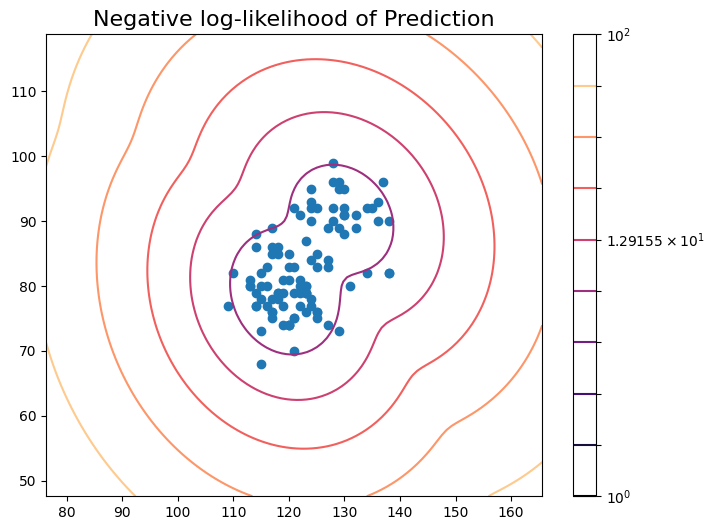

In [3]:
clf = GaussianMixture(n_components=2, covariance_type='full')

clf.fit(X)

resolution = 100

vec_a = linspace(0.7*min(X[:,0]), 1.2*max(X[:,0]), resolution)
vec_b = linspace(0.7*min(X[:,1]), 1.2*max(X[:,1]), resolution)

grid_a, grid_b = meshgrid(vec_a, vec_b)

XY_statespace = c_[grid_a.ravel(), grid_b.ravel()];

Z_score = clf.score_samples(XY_statespace);

Z_s = Z_score.reshape(grid_a.shape);


fig, ax = subplots(figsize=(8, 6))

cax = ax.contour(grid_a, grid_b, -Z_s,
           norm=LogNorm(vmin=1.0, vmax=100.0),
           levels=logspace(0, 2, 10),
           cmap='magma'
          );

fig.colorbar(cax);

ax.scatter(X[:, 0], X[:, 1]);

title('Negative log-likelihood of Prediction', fontsize=16)
axis('tight');

show()

3. Extract the model weights, the means of the two Gaussians and their corresponding covariance matrices.

In [4]:
print('Model Weights: ')
print(clf.weights_)
print('')

print('Mean coordinates: ')
print(clf.means_)
print('')
print('Covariance Matrices: ')
print(clf.covariances_)

Model Weights: 
[0.3463565 0.6536435]

Mean coordinates: 
[[129.51551579  90.3962569 ]
 [119.21094489  79.01963203]]

Covariance Matrices: 
[[[24.25340701 -3.75701522]
  [-3.75701522 19.36301886]]

 [[18.62154032 -2.53646526]
  [-2.53646526 17.70124705]]]


4. Calculate the adjusted random score for the labels 'gender' and 'smoker' in the data to estimate whether these have som overlap with the model fit.

In [5]:
y_predict = clf.predict(X)

gender_boolean = df['Gender'] == 'Female'

y_gender = gender_boolean.to_numpy()

scoring = adjusted_rand_score(y_gender, y_predict)

print(scoring)

0.030809331315545804


In [6]:
y_smoker = df['Smoker']

scoring = adjusted_rand_score(y_smoker, y_predict)

print(scoring)

0.7349708237209933


5. Compare the original scatter plot versus the model generated scatter plot. Use a total of 100 samples for the model generated data and distribute them according to the model weights.

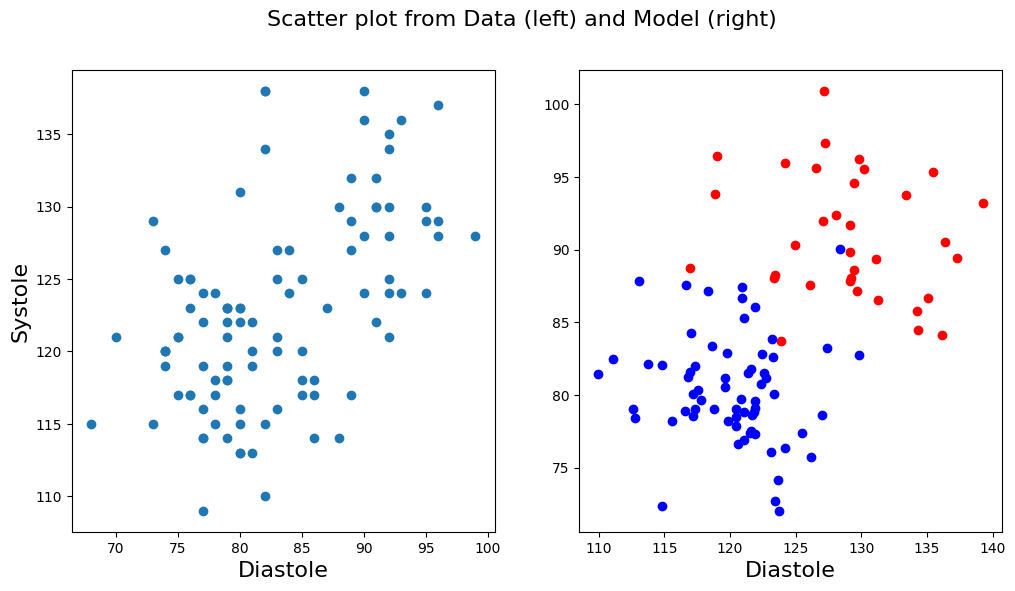

In [7]:
group1_mean = clf.means_[0]
group1_cov  = clf.covariances_[0]

group2_mean = clf.means_[1]
group2_cov  = clf.covariances_[1]

samples = 100

group1_data = multivariate_normal(group1_mean, group1_cov, int(clf.weights_[0]*100))
group2_data = multivariate_normal(group2_mean, group2_cov, int(clf.weights_[1]*100))

fig, ax = subplots(ncols=2, figsize=(12, 6))

ax[0].scatter(df['Diastolic'], df['Systolic']);
ax[0].set_xlabel('Diastole', fontsize=16)
ax[0].set_ylabel('Systole', fontsize=16)

ax[1].scatter(group1_data[:, 0], group1_data[:, 1], c='r');
ax[1].scatter(group2_data[:, 0], group2_data[:, 1], c='b');
ax[1].set_xlabel('Diastole', fontsize=16)

fig.suptitle('Scatter plot from Data (left) and Model (right)', fontsize=16);
show()

6. Repeat the plot multiple times to see how the degree of overlap in the model output changes with each choice of samples from the fitted distribution.

7. Create corresponding histograms of the Diastolic and Systolic blood pressure values from data and model. Try to guess where the differences in appearance come from.


The data show systematic gaps in the histogram meaning that some values do not occur (integer values only). In contrast, the model data from the random number generator can take any value. Therefore the counts per bin are generally lower for the model.

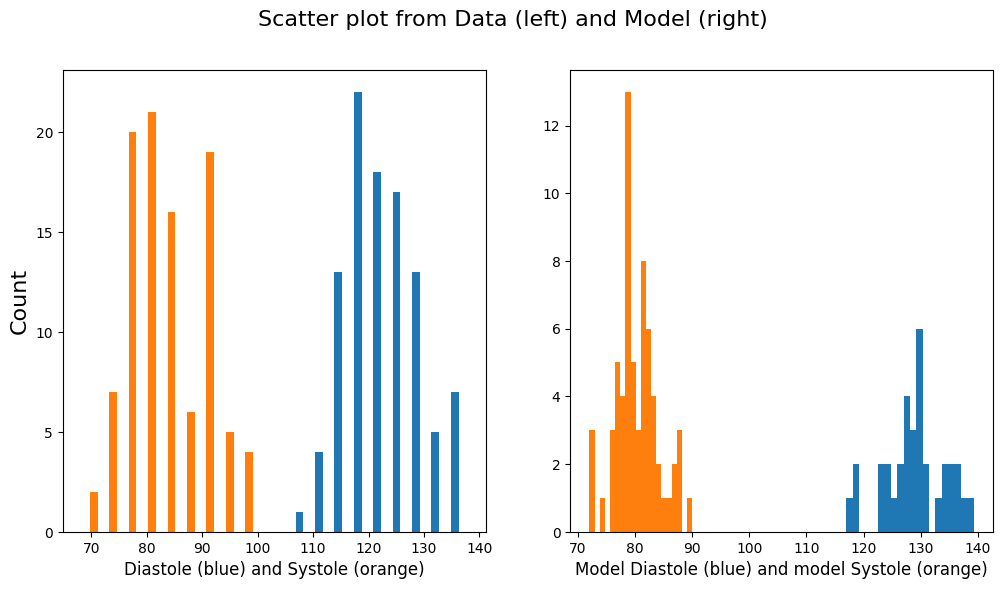

In [8]:
fig, ax = subplots(ncols=2, figsize=(12, 6))

bins = 20
ax[0].hist(X, bins=bins);
ax[0].set_xlabel('Diastole (blue) and Systole (orange)', fontsize=12)
ax[0].set_ylabel('Count', fontsize=16)

ax[1].hist(group1_data[:, 0], bins=bins);
ax[1].hist(group2_data[:, 1], bins=bins);
ax[1].set_xlabel('Model Diastole (blue) and model Systole (orange)', fontsize=12)

fig.suptitle('Scatter plot from Data (left) and Model (right)', fontsize=16);
show()

The data show systematic gaps in the histogram meaning that some values do not occur (integer values only). In contrast, the model data from the random number generator can take any value. Therefore the counts per bin are generally lower for the model.